**Import libraries**

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

**Load dataset**

In [86]:
df = pd.read_csv('/content/Q2.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustID            440 non-null    int64  
 1   Channel           440 non-null    object 
 2   Region            440 non-null    object 
 3   Fresh             440 non-null    object 
 4   Milk              440 non-null    int64  
 5   Grocery           440 non-null    int64  
 6   Frozen            440 non-null    int64  
 7   Detergents_Paper  439 non-null    float64
 8   Delicatessen      440 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 31.1+ KB


**Data cleaning**

In [88]:
# Remove data records with negative milk quantity
df.loc[df['Milk'] < 0].shape

(1, 9)

In [89]:
df = df.loc[df['Milk'] >= 0]

In [90]:
df.shape

(439, 9)

In [91]:
# Remove a very few records with missing values
df = df.dropna()
df.shape

(438, 9)

In [92]:
# Remove records that contains alphabets in the Fresh column
df = df[~df['Fresh'].str.contains("[a-zA-Z]").fillna(False)]

In [93]:
# Change the type of "Fresh" from categorical to numerical (integer)
df['Fresh'] = df['Fresh'].astype(str).astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustID            437 non-null    int64  
 1   Channel           437 non-null    object 
 2   Region            437 non-null    object 
 3   Fresh             437 non-null    int64  
 4   Milk              437 non-null    int64  
 5   Grocery           437 non-null    int64  
 6   Frozen            437 non-null    int64  
 7   Detergents_Paper  437 non-null    float64
 8   Delicatessen      437 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 34.1+ KB


<Axes: >

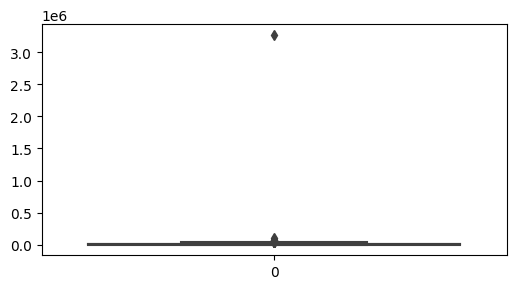

In [95]:
sns.boxplot(df['Fresh'])

In [96]:
# Remove outlier using the interquartile range approach
percentile_low = df['Fresh'].quantile(0.01)
percentile_up = df['Fresh'].quantile(0.99)

In [97]:
iqr = percentile_up - percentile_low

In [98]:
upper_limit = percentile_up + 1.5 * iqr
lower_limit = percentile_low - 1.5 * iqr

In [99]:
df[df['Fresh'] > upper_limit]
df[df['Fresh'] < lower_limit]
df

,CustID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,online,Shenzhen,12669,9656,7561,214,2674.0,1338
1,2,online,Shenzhen,7057,9810,9568,1762,3293.0,1776
2,3,online,Shenzhen,6353,8808,7684,2405,3516.0,7844
3,4,offline,Shenzhen,13265,1196,4221,6404,507.0,1788
4,5,online,Shenzhen,22615,5410,7198,3915,1777.0,5185
...,...,...,...,...,...,...,...,...,...
435,436,offline,Shenzhen,29703,12051,16027,13135,182.0,2204
436,437,offline,Shenzhen,39228,1431,764,4510,93.0,2346
437,438,online,Shenzhen,14531,15488,30243,437,14841.0,1867
438,439,offline,Shenzhen,10290,1981,2232,1038,168.0,2125


In [100]:
upper_limit

140247.68

In [101]:
df = df[df['Fresh'] < upper_limit]
df.shape

(436, 9)

**Some EDA**

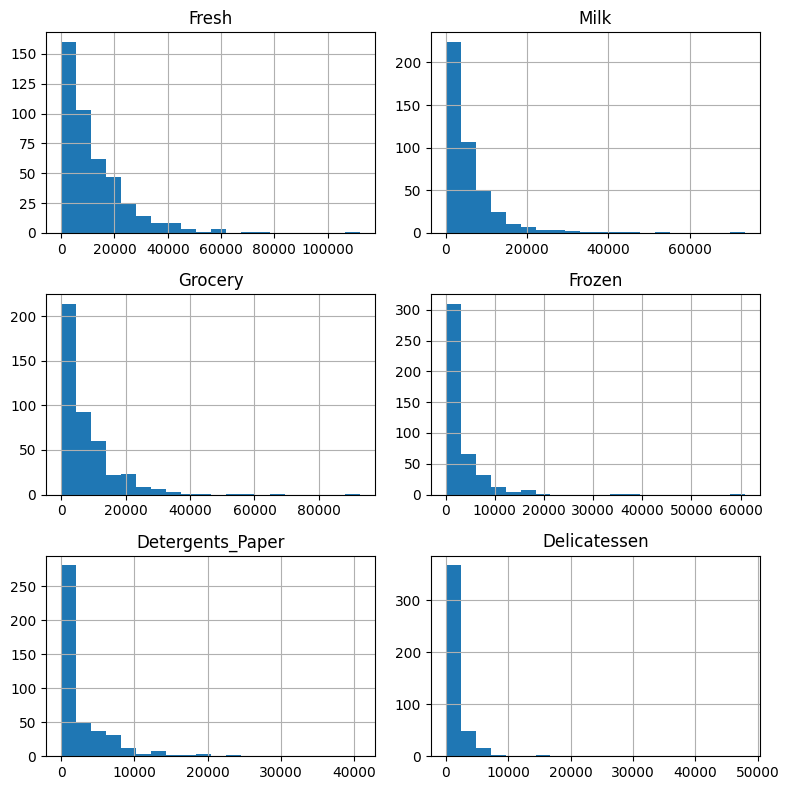

In [102]:
# Remove CustID, Channel and Region from the data
df1 = df.drop(['CustID', 'Channel', 'Region'], axis=1)

from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)
df1.hist(bins=20)
plt.tight_layout() 
plt.show()

# You can see there are many low spending customers, which is expected

In [103]:
# Model construction using K-Means
from sklearn.cluster import KMeans
clusters=4
algorithm = KMeans(n_clusters=clusters, random_state=183)

In [104]:
# Training
y_pred = algorithm.fit_predict(df1)
print(y_pred[:20])

[3 2 3 3 0 3 3 3 3 2 2 3 0 2 0 3 2 3 3 3]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [105]:
# Calculate the means of each cluster
df_cluster = df1.groupby(y_pred).mean()
display(df_cluster)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
1,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000
2,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
3,9209.507353,3047.580882,3738.959559,2829.555147,1001.573529,1051.261029


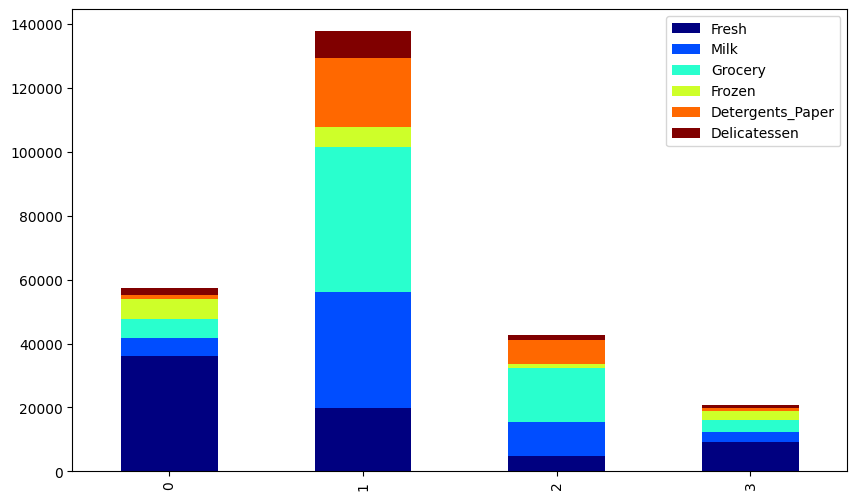

In [106]:
# Create a plot
df_cluster.plot(kind='bar',stacked=True,
    figsize=(10, 6),colormap='jet')
plt.show()

**Some interpretations of the results**

Suggested answers:

1.   Cluster #1 is so-called "large quantity cluster" because the customers in this cluster have higher spendings.
2.   Cluster #3 is so-called "small quantity cluster" because the customers in this cluster have lower spendings.
3.   Cluster #0 is so-called "fresh cluster" because the customers in this cluster spend twice or even more than the other clusters. So they love fresh food a lot.
4.   Cluster #2 is so-called "Grocery cluster" because the customers in this cluster tend to have a high spending on grocery.
5.   Now we can apply different promotion strategies for different clusters based on their characteristics. E.g., give discounts on fresh products for customers in cluster #0, and so forth.




**Relationships between clusters and "Channel" & "Region"**

In [107]:
# Simple encoding
# Sales channel OFFLINE = 0, Sales channel ONLINE = 1
df2 = df[['Region', 'Channel']]
mymap = {'offline':0, 'online':1}
df2 = df2.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [108]:
# Region BEIJING = 0, HK = 1, SHENZHEN = 2
mymap = {'Beijing':0, 'HK':1, 'Shenzhen':2}
df2 = df2.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [109]:
df2

,Region,Channel
0,2,1
1,2,1
2,2,1
3,2,0
4,2,1
...,...,...
435,2,0
436,2,0
437,2,1
438,2,0


==== Cluster0 ====


<ipython-input-84-accaa493703a>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  w.hist(ax=ax)


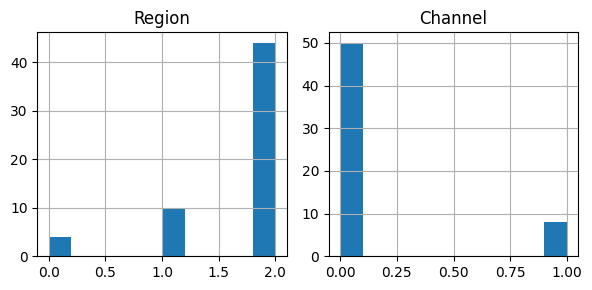

==== Cluster1 ====


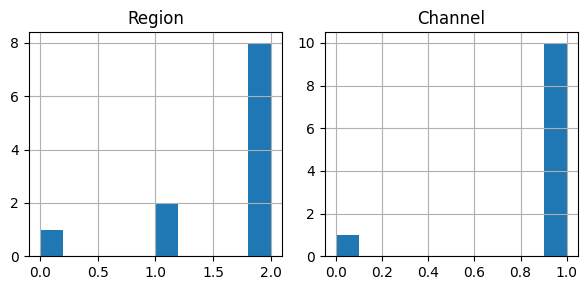

==== Cluster2 ====


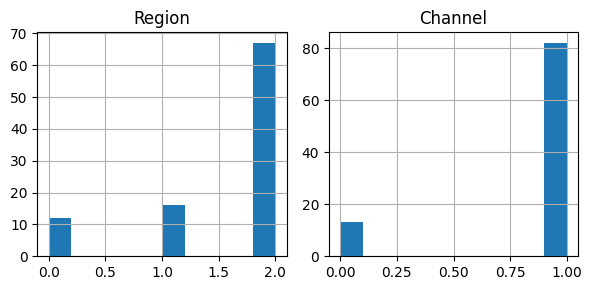

==== Cluster3 ====


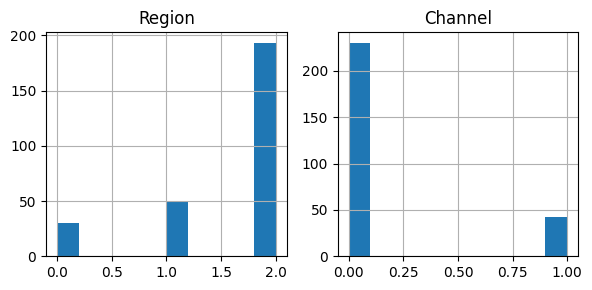

In [84]:
rcParams['figure.figsize'] = (6,3)
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df2[y_pred==i]
    print(f'==== Cluster{i} ====')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()

**Analysis Results**
1.   Cluster #0 (fresh) and group 3 (small quantity) are closely related to sales channel 0 (offline). As a result, it is possible for customers in cluster #0 switching to cluster #3, and vice versa.
2.   Cluster #1 (large quantity) and cluster #2 (grocery) are closely related to sales channel 1 (online). As a result, it is possible for customers in cluster #1 switching to cluster #2, and vice versa.
3.   The proportion of each cluster in the three regions is similar. Hence, no special correlation was found between regions and clusters.